# Import libs

In [4]:
import pandas as pd
import numpy as np
from models.knn.knn import knn
from models.dmc.dmc import dmc
from models.kmeans.kmeans import kmeans
from models.naive_bayes_classifier.naive_bayes_classifier import naive_bayes_classifier
from models.bayes_classifier.bayes_classifier import bayes_classifier
from models.bayes_linear_classifier.bayes_linear_classifier import bayes_linear_classifier
from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
from utils.functions import confusion_matrix, confusion_matrix_mean, min_max_normalization
from matplotlib import pyplot as plt

# Loading normalized Dermatology dataset

In [5]:
Xy = pd.read_csv('./datasets/dermatology.csv')

X = min_max_normalization(Xy.drop(['class'], axis=1))
y = Xy['class']

# Running the tests and computing informations

In [6]:
realizations = 20
knn_hit_rate_list = []
dmc_hit_rate_list = []
kmeans_hit_rate_list = []
nb_hit_rate_list = []
b_hit_rate_list = []
b_majority_class_hit_rate_list = []
b_mean_class_hit_rate_list = []
lb_hit_rate_list = []

knn_std_dev = 0
dmc_std_dev = 0
kmeans_std_dev = 0
nb_std_dev = 0
b_std_dev = 0
b_majority_class_std_dev = 0
b_mean_class_std_dev = 0
lb_std_dev = 0

knn_confusion_matrix_list = []
dmc_confusion_matrix_list = []
kmeans_confusion_matrix_list = []
nb_confusion_matrix_list = []
b_confusion_matrix_list = []
b_majority_class_confusion_matrix_list = []
b_mean_class_confusion_matrix_list = []
lb_confusion_matrix_list = []

for r in range(realizations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    knn_model = knn(k=3, type_distance_calc='euclidean')
    knn_model.fit(X_train, y_train)

    dmc_model = dmc(type_distance_calc='euclidean')
    dmc_model.fit(X_train, y_train)

    kmeans_model = kmeans(k=25, type_distance_calc='euclidean', number_iteration=300)
    kmeans_model.fit(X_train, y_train)

    nb_model = naive_bayes_classifier()
    nb_model.fit(X_train, y_train)

    b_model = bayes_classifier()
    b_model.fit(X_train, y_train)

    b_majority_class_model = bayes_classifier(covariance_matrix_type='majority_class')
    b_majority_class_model.fit(X_train, y_train)

    b_mean_class_model = bayes_classifier(covariance_matrix_type='mean_class')
    b_mean_class_model.fit(X_train, y_train)

    lb_model = bayes_linear_classifier()
    lb_model.fit(X_train, y_train)

    knn_hit_rate_list.append(knn_model.score(X_test, y_test))
    dmc_hit_rate_list.append(dmc_model.score(X_test, y_test))
    kmeans_hit_rate_list.append(kmeans_model.score(X_test, y_test))
    nb_hit_rate_list.append(nb_model.score(X_test, y_test))
    b_hit_rate_list.append(b_model.score(X_test, y_test))
    b_majority_class_hit_rate_list.append(b_majority_class_model.score(X_test, y_test))
    b_mean_class_hit_rate_list.append(b_mean_class_model.score(X_test, y_test))
    lb_hit_rate_list.append(lb_model.score(X_test, y_test))

    knn_y_pred = [knn_model.predict(x) for x in X_test.values]
    dmc_y_pred = [dmc_model.predict(x) for x in X_test.values]
    kmeans_y_pred = [kmeans_model.predict(x) for x in X_test.values]
    nb_y_pred = [nb_model.predict(x) for x in X_test.values]
    b_y_pred = [b_model.predict(x) for x in X_test.values]
    b_majority_class_y_pred = [b_majority_class_model.predict(x) for x in X_test.values]
    b_mean_class_y_pred = [b_mean_class_model.predict(x) for x in X_test.values]
    lb_y_pred = [lb_model.predict(x) for x in X_test.values]

    knn_confusion_matrix_list.append(confusion_matrix(y_test, knn_y_pred))
    dmc_confusion_matrix_list.append(confusion_matrix(y_test, dmc_y_pred))
    kmeans_confusion_matrix_list.append(confusion_matrix(y_test, kmeans_y_pred))
    nb_confusion_matrix_list.append(confusion_matrix(y_test, nb_y_pred))
    b_confusion_matrix_list.append(confusion_matrix(y_test, b_y_pred))
    b_majority_class_confusion_matrix_list.append(confusion_matrix(y_test, b_majority_class_y_pred))
    b_mean_class_confusion_matrix_list.append(confusion_matrix(y_test, b_mean_class_y_pred))
    lb_confusion_matrix_list.append(confusion_matrix(y_test, lb_y_pred))

knn_std_dev = np.std(knn_hit_rate_list)
dmc_std_dev = np.std(dmc_hit_rate_list)
kmeans_std_dev = np.std(kmeans_hit_rate_list)
nb_std_dev = np.std(nb_hit_rate_list)
b_std_dev = np.std(b_hit_rate_list)
b_majority_class_std_dev = np.std(b_majority_class_hit_rate_list)
b_mean_class_std_dev = np.std(b_mean_class_hit_rate_list)
lb_std_dev = np.std(lb_hit_rate_list)

w:\Home\ML\models\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\models\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\models\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\models\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\models\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'floa

# Showing knn informations computed

In [7]:
print('----------------- KNN model -----------------')
print('Hit rate:')
print(knn_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(knn_hit_rate_list)/len(knn_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(knn_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in knn_confusion_matrix_list:
    print(matrix, end='\n')

----------------- KNN model -----------------
Hit rate:
[0.9864864864864865, 0.9459459459459459, 0.9864864864864865, 0.9594594594594594, 0.972972972972973, 0.972972972972973, 0.972972972972973, 0.972972972972973, 0.9864864864864865, 0.972972972972973, 0.9864864864864865, 0.972972972972973, 0.9594594594594594, 0.9594594594594594, 0.9864864864864865, 0.972972972972973, 0.9324324324324325, 0.9594594594594594, 0.9864864864864865, 0.9594594594594594]

Accuracy:
0.9702702702702704

Standard Deviation:
0.014554499478741918

Confusion Matrix:
    2   5   1   3  6  4
2  11   0   0   0  0  1
5   0  12   0   0  0  0
1   0   0  26   0  0  0
3   0   0   0  13  0  0
6   0   0   0   0  4  0
4   0   0   0   0  0  7
    1   2  5   3  6   4
1  24   1  0   0  0   0
2   0  10  0   0  0   2
5   0   0  9   0  0   0
3   0   0  0  15  0   0
6   0   0  0   0  2   0
4   0   1  0   0  0  10
   4   3   2   1   5  6
4  9   0   1   0   0  0
3  0  20   0   0   0  0
2  0   0  13   0   0  0
1  0   0   0  20   0  0
5  

In [8]:
confusion_matrix_mean(knn_confusion_matrix_list)

,2,5,1,3,6,4
2,11,0,0,0,0,1
5,0,10,0,0,0,0
1,0,0,22,0,0,0
3,0,0,0,14,0,0
6,0,0,0,0,4,0
4,0,0,0,0,0,9


# Showing dmc informations computed

In [9]:
print('----------------- DMC model -----------------')
print('Hit rate:')
print(dmc_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(dmc_hit_rate_list)/len(dmc_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(dmc_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in dmc_confusion_matrix_list:
    print(matrix, end='\n')

----------------- DMC model -----------------
Hit rate:
[0.972972972972973, 0.9594594594594594, 0.9864864864864865, 0.9594594594594594, 0.9594594594594594, 0.972972972972973, 0.972972972972973, 0.9864864864864865, 0.972972972972973, 0.9594594594594594, 0.9594594594594594, 0.9864864864864865, 0.9459459459459459, 0.972972972972973, 1.0, 0.9864864864864865, 0.9459459459459459, 0.9594594594594594, 0.972972972972973, 0.9459459459459459]

Accuracy:
0.9689189189189189

Standard Deviation:
0.014864864864864881

Confusion Matrix:
    2   5   1   3  6  4
2  11   0   0   0  0  1
5   0  12   0   0  0  0
1   0   0  26   0  0  0
3   0   0   0  13  0  0
6   0   0   0   0  4  0
4   1   0   0   0  0  6
    1   2  5   3  6   4
1  24   1  0   0  0   0
2   0  10  0   0  0   2
5   0   0  9   0  0   0
3   0   0  0  15  0   0
6   0   0  0   0  2   0
4   0   0  0   0  0  11
   4   3   2   1   5  6
4  9   0   1   0   0  0
3  0  20   0   0   0  0
2  0   0  13   0   0  0
1  0   0   0  20   0  0
5  0   0   0   0 

In [10]:
confusion_matrix_mean(dmc_confusion_matrix_list)

,2,5,1,3,6,4
2,11,0,0,0,0,1
5,0,10,0,0,0,0
1,0,0,22,0,0,0
3,0,0,0,14,0,0
6,0,0,0,0,4,0
4,0,0,0,0,0,9


# Showing kmeans informations computed

In [11]:
print('----------------- KMEANS model -----------------')
print('Hit rate:')
print(kmeans_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(kmeans_hit_rate_list)/len(kmeans_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(kmeans_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in kmeans_confusion_matrix_list:
    print(matrix, end='\n')

----------------- KMEANS model -----------------
Hit rate:
[0.972972972972973, 0.972972972972973, 0.972972972972973, 0.9594594594594594, 0.9324324324324325, 0.9594594594594594, 0.918918918918919, 0.9594594594594594, 0.9324324324324325, 0.9594594594594594, 0.9459459459459459, 0.9324324324324325, 0.9459459459459459, 0.9324324324324325, 0.972972972972973, 0.9459459459459459, 0.918918918918919, 0.9459459459459459, 0.9459459459459459, 0.9864864864864865]

Accuracy:
0.950675675675676

Standard Deviation:
0.01876140996880381

Confusion Matrix:
    2   5   1   3  6  4
2  11   0   0   0  0  1
5   0  12   0   0  0  0
1   0   0  26   0  0  0
3   0   0   0  13  0  0
6   0   0   0   0  4  0
4   1   0   0   0  0  6
    1   2  5   3  6   4
1  25   0  0   0  0   0
2   0  10  1   0  0   1
5   0   0  9   0  0   0
3   0   0  0  15  0   0
6   0   0  0   0  2   0
4   0   0  0   0  0  11
   4   3   2   1  5  6
4  9   0   1   0  0  0
3  0  20   0   0  0  0
2  0   0  13   0  0  0
1  0   0   0  20  0  0
5  1  

In [12]:
confusion_matrix_mean(kmeans_confusion_matrix_list)

,2,5,1,3,6,4
2,10,0,0,0,0,2
5,0,10,0,0,0,0
1,0,0,21,0,0,0
3,0,0,0,14,0,0
6,0,0,0,0,4,0
4,0,0,0,0,0,9


# Showing naive bayes informations computed

In [13]:
print('----------------- NAIVE BAYES model -----------------')
print('Hit rate:')
print(nb_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(nb_hit_rate_list)/len(nb_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(nb_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in nb_confusion_matrix_list:
    print(matrix, end='\n')

----------------- NAIVE BAYES model -----------------
Hit rate:
[0.8648648648648649, 0.8378378378378378, 0.8378378378378378, 0.7297297297297297, 0.8648648648648649, 0.8648648648648649, 0.8378378378378378, 0.8918918918918919, 0.7972972972972973, 0.8513513513513513, 0.8648648648648649, 0.8243243243243243, 0.8108108108108109, 0.9324324324324325, 0.7837837837837838, 0.7702702702702703, 0.8108108108108109, 0.8378378378378378, 0.8783783783783784, 0.8513513513513513]

Accuracy:
0.8371621621621623

Standard Deviation:
0.044301864777798676

Confusion Matrix:
    2   5   1   3  6  4
2  12   0   0   0  0  0
5   2  10   0   0  0  0
1   1   0  25   0  0  0
3   1   0   0  12  0  0
6   0   0   0   0  3  1
4   4   1   0   0  0  2
    1   2  5   3  6  4
1  25   0  0   0  0  0
2   1  11  0   0  0  0
5   1   1  7   0  0  0
3   0   0  0  15  0  0
6   0   0  0   0  2  0
4   0   5  4   0  0  2
   4   3   2   1  5  6
4  0   0  10   0  0  0
3  0  20   0   0  0  0
2  0   0  12   1  0  0
1  0   0   0  20  0  0


In [14]:
confusion_matrix_mean(nb_confusion_matrix_list)

,2,5,1,3,6,4
2,12,0,0,0,0,0
5,1,7,0,0,0,0
1,0,0,21,0,0,0
3,0,0,0,14,0,0
6,0,0,0,0,3,0
4,6,0,0,0,0,2


# Showing bayes informations computed

In [15]:
print('----------------- BAYES model -----------------')
print('Hit rate:')
print(b_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(b_hit_rate_list)/len(b_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(b_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in b_confusion_matrix_list:
    print(matrix, end='\n')

----------------- BAYES model -----------------
Hit rate:
[0.9864864864864865, 0.918918918918919, 0.9459459459459459, 0.9054054054054054, 0.918918918918919, 0.8783783783783784, 0.8783783783783784, 0.9054054054054054, 0.9459459459459459, 0.8783783783783784, 0.8783783783783784, 0.918918918918919, 0.9594594594594594, 0.9594594594594594, 0.9594594594594594, 0.9324324324324325, 0.9594594594594594, 0.8648648648648649, 0.918918918918919, 0.9054054054054054]

Accuracy:
0.9209459459459461

Standard Deviation:
0.0337229181445075

Confusion Matrix:
    2   5   1   3  6  4
2  12   0   0   0  0  0
5   0  12   0   0  0  0
1   0   0  26   0  0  0
3   0   0   0  13  0  0
6   1   0   0   0  3  0
4   0   0   0   0  0  7
    1  2  5   3  6   4
1  25  0  0   0  0   0
2   0  9  0   1  0   2
5   0  0  9   0  0   0
3   0  0  0  15  0   0
6   0  0  0   2  0   0
4   0  0  0   1  0  10
   4   3   2   1   5  6
4  8   0   2   0   0  0
3  0  20   0   0   0  0
2  0   1  12   0   0  0
1  0   0   0  20   0  0
5  0   

In [16]:
confusion_matrix_mean(b_confusion_matrix_list)

,2,5,1,3,6,4
2,11,0,0,0,0,0
5,0,9,0,0,0,0
1,0,0,22,0,0,0
3,0,0,0,14,0,0
6,0,0,0,0,2,0
4,0,0,0,0,0,8


# Showing Bayes Majority Class Informations computed

In [17]:
print('----------------- BAYES M C model -----------------')
print('Hit rate:')
print(b_majority_class_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(b_majority_class_hit_rate_list)/len(b_majority_class_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(b_majority_class_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in b_majority_class_confusion_matrix_list:
    print(matrix, end='\n')

----------------- BAYES M C model -----------------
Hit rate:
[0.40540540540540543, 0.5405405405405406, 0.5405405405405406, 0.35135135135135137, 0.43243243243243246, 0.581081081081081, 0.4189189189189189, 0.43243243243243246, 0.44594594594594594, 0.3783783783783784, 0.36486486486486486, 0.35135135135135137, 0.36486486486486486, 0.32432432432432434, 0.35135135135135137, 0.33783783783783783, 0.33783783783783783, 0.47297297297297297, 0.3108108108108108, 0.3108108108108108]

Accuracy:
0.4027027027027027

Standard Deviation:
0.07793443705565521

Confusion Matrix:
   2  5   1  3   6  4
2  0  0   0  0  12  0
5  0  0   0  0  12  0
1  0  0  26  0   0  0
3  0  0   0  0  13  0
6  0  0   0  0   4  0
4  0  0   1  0   6  0
    1  2  5   3  6  4
1  25  0  0   0  0  0
2   1  0  0  11  0  0
5   0  0  0   9  0  0
3   0  0  0  15  0  0
6   0  0  0   2  0  0
4   0  0  0  11  0  0
   4   3  2   1  5  6
4  0  10  0   0  0  0
3  0  20  0   0  0  0
2  0  12  0   1  0  0
1  0   0  0  20  0  0
5  0  10  0   0  

In [18]:
confusion_matrix_mean(b_majority_class_confusion_matrix_list)

,2,5,1,3,6,4
2,0,0,0,1,8,0
5,0,0,0,1,7,0
1,0,0,22,0,0,0
3,0,1,0,2,9,0
6,0,0,0,0,3,0
4,0,1,0,1,6,0


# Showing Bayes Mean Class informations computed

In [19]:
print('----------------- BAYES MEAN C model -----------------')
print('Hit rate:')
print(b_mean_class_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(b_mean_class_hit_rate_list)/len(b_mean_class_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(b_mean_class_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in b_mean_class_confusion_matrix_list:
    print(matrix, end='\n')

----------------- BAYES MEAN C model -----------------
Hit rate:
[0.9864864864864865, 0.972972972972973, 1.0, 0.972972972972973, 0.9864864864864865, 0.9864864864864865, 0.972972972972973, 0.9864864864864865, 1.0, 0.972972972972973, 0.9864864864864865, 0.9864864864864865, 0.9594594594594594, 0.972972972972973, 0.9594594594594594, 0.972972972972973, 0.9324324324324325, 0.9594594594594594, 0.972972972972973, 0.918918918918919]

Accuracy:
0.9729729729729731

Standard Deviation:
0.019582941548904647

Confusion Matrix:
    2   5   1   3  6  4
2  12   0   0   0  0  0
5   0  12   0   0  0  0
1   0   0  25   0  0  1
3   0   0   0  13  0  0
6   0   0   0   0  4  0
4   0   0   0   0  0  7
    1   2  5   3  6   4
1  25   0  0   0  0   0
2   0  10  0   0  0   2
5   0   0  9   0  0   0
3   0   0  0  15  0   0
6   0   0  0   0  2   0
4   0   0  0   0  0  11
    4   3   2   1   5  6
4  10   0   0   0   0  0
3   0  20   0   0   0  0
2   0   0  13   0   0  0
1   0   0   0  20   0  0
5   0   0   0   0  1

In [20]:
confusion_matrix_mean(b_mean_class_confusion_matrix_list)

,2,5,1,3,6,4
2,11,0,0,0,0,1
5,0,10,0,0,0,0
1,0,0,22,0,0,0
3,0,0,0,14,0,0
6,0,0,0,0,4,0
4,0,0,0,0,0,9


# Showing Linear Bayes informations computed

In [21]:
print('----------------- LINEAR BAYES model -----------------')
print('Hit rate:')
print(lb_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(lb_hit_rate_list)/len(lb_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(lb_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in lb_confusion_matrix_list:
    print(matrix, end='\n')

----------------- LINEAR BAYES model -----------------
Hit rate:
[0.9864864864864865, 0.9594594594594594, 0.972972972972973, 0.9459459459459459, 0.9459459459459459, 0.9459459459459459, 0.9594594594594594, 0.9864864864864865, 0.972972972972973, 0.972972972972973, 0.972972972972973, 0.9594594594594594, 0.9324324324324325, 0.9594594594594594, 0.9459459459459459, 0.9459459459459459, 0.9324324324324325, 0.9459459459459459, 0.972972972972973, 0.9594594594594594]

Accuracy:
0.9587837837837838

Standard Deviation:
0.01568673887330258

Confusion Matrix:
    2   5   1   3  6  4
2  12   0   0   0  0  0
5   0  12   0   0  0  0
1   1   0  25   0  0  0
3   0   0   0  13  0  0
6   0   0   0   0  4  0
4   0   0   0   0  0  7
    1   2  5   3  6   4
1  24   1  0   0  0   0
2   0  10  0   0  0   2
5   0   0  9   0  0   0
3   0   0  0  15  0   0
6   0   0  0   0  2   0
4   0   0  0   0  0  11
   4   3   2   1  5  6
4  9   0   1   0  0  0
3  0  20   0   0  0  0
2  0   0  13   0  0  0
1  0   0   0  20  0  

In [22]:
confusion_matrix_mean(lb_confusion_matrix_list)

,2,5,1,3,6,4
2,11,0,0,0,0,1
5,0,9,0,0,0,0
1,0,0,21,0,0,0
3,0,0,0,14,0,0
6,0,0,0,0,3,0
4,0,0,0,0,0,9


# Choosing two columns from the last X_train and X_test to plot decision surface

In [23]:
X_train_2d, X_test_2d = X_train[['erythema', 'scaling']], X_test[['erythema', 'scaling']]

print('Train dataset:')
print(X_train_2d)
print('Test dataset:')
print(X_test_2d)

Train dataset:
     erythema   scaling
72   0.333333  0.333333
263  0.333333  0.333333
261  0.666667  0.666667
198  0.666667  0.666667
351  0.666667  0.666667
..        ...       ...
183  0.666667  0.666667
270  0.666667  0.666667
365  1.000000  0.666667
361  0.666667  0.333333
292  0.666667  1.000000

[292 rows x 2 columns]
Test dataset:
     erythema   scaling
177  0.666667  0.666667
151  0.666667  1.000000
205  1.000000  0.666667
46   0.666667  0.333333
324  0.666667  0.666667
..        ...       ...
172  1.000000  0.666667
345  0.666667  0.666667
124  1.000000  0.666667
95   0.666667  0.333333
81   1.000000  0.666667

[74 rows x 2 columns]


# Training the models with the new dataset 2d

In [24]:
knn_model = knn(k=3, type_distance_calc='euclidean')
knn_model.fit(X_train_2d, y_train)
dmc_model = dmc(type_distance_calc='euclidean')
dmc_model.fit(X_train_2d, y_train)
kmeans_model = kmeans(k=25, type_distance_calc='euclidean', number_iteration=300)
kmeans_model.fit(X_train_2d, y_train)
nb_model = naive_bayes_classifier()
nb_model.fit(X_train_2d, y_train)
b_model = bayes_classifier()
b_model.fit(X_train_2d, y_train)
b_majority_class_model = bayes_classifier(covariance_matrix_type='majority_class')
b_majority_class_model.fit(X_train_2d, y_train)
b_mean_class_model = bayes_classifier(covariance_matrix_type='mean_class')
b_mean_class_model.fit(X_train_2d, y_train)
lb_model = bayes_linear_classifier()
lb_model.fit(X_train_2d, y_train)

w:\Home\ML\models\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])


# Plotting knn decision surface

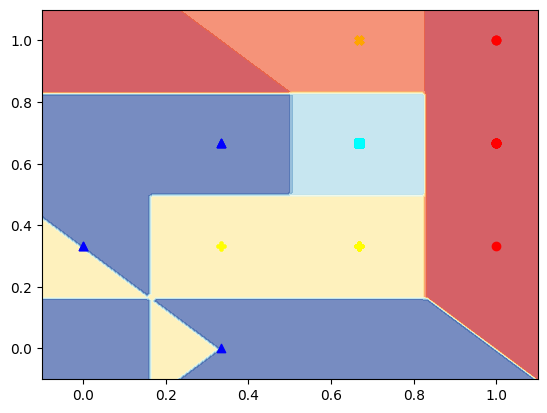

In [25]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[knn_model.predict(x) for x in x_in]]

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

knn_y_pred = np.array([knn_model.predict(x) for x in X_test_2d.values])

one = np.where(knn_y_pred == 1)
two = np.where(knn_y_pred == 2)
three = np.where(knn_y_pred == 3)
four = np.where(knn_y_pred == 4)
five = np.where(knn_y_pred == 5)
six = np.where(knn_y_pred == 6)

plt.scatter(data[one, 0], data[one, 1],
            color='red', marker='o', label='One')
plt.scatter(data[two, 0], data[two, 1],
            color='orange', marker='X', label='Two')
plt.scatter(data[three, 0], data[three, 1],
            color='yellow', marker='P', label='Three')
plt.scatter(data[four, 0], data[four, 1],
            color='cyan', marker='s', label='Four')
plt.scatter(data[five, 0], data[five, 1],
            color='blue', marker='^', label='Five')
plt.scatter(data[six, 0], data[six, 1],
            color='green', marker='D', label='Six')

plt.show()

# Plotting dmc decision surface

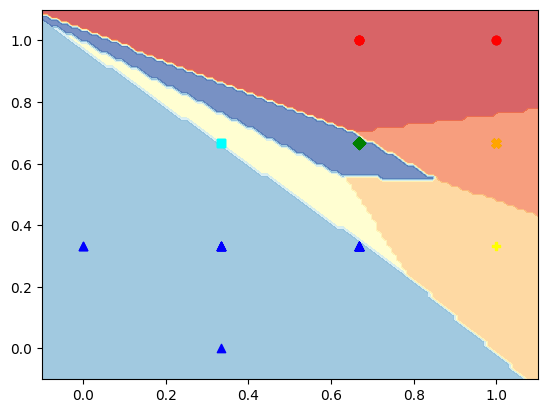

In [26]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[dmc_model.predict(x) for x in x_in]]

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

dmc_y_pred = np.array([dmc_model.predict(x) for x in X_test_2d.values])

one = np.where(dmc_y_pred == 1)
two = np.where(dmc_y_pred == 2)
three = np.where(dmc_y_pred == 3)
four = np.where(dmc_y_pred == 4)
five = np.where(dmc_y_pred == 5)
six = np.where(dmc_y_pred == 6)

plt.scatter(data[one, 0], data[one, 1],
            color='red', marker='o', label='One')
plt.scatter(data[two, 0], data[two, 1],
            color='orange', marker='X', label='Two')
plt.scatter(data[three, 0], data[three, 1],
            color='yellow', marker='P', label='Three')
plt.scatter(data[four, 0], data[four, 1],
            color='cyan', marker='s', label='Four')
plt.scatter(data[five, 0], data[five, 1],
            color='blue', marker='^', label='Five')
plt.scatter(data[six, 0], data[six, 1],
            color='green', marker='D', label='Six')

plt.show()

# Plotting kmeans decision surface

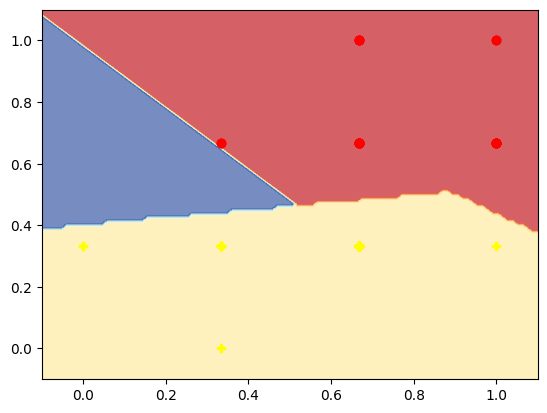

In [27]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[kmeans_model.predict(x) for x in x_in]]

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

kmeans_y_pred = np.array([kmeans_model.predict(x) for x in X_test_2d.values])

one = np.where(kmeans_y_pred == 1)
two = np.where(kmeans_y_pred == 2)
three = np.where(kmeans_y_pred == 3)
four = np.where(kmeans_y_pred == 4)
five = np.where(kmeans_y_pred == 5)
six = np.where(kmeans_y_pred == 6)

plt.scatter(data[one, 0], data[one, 1],
            color='red', marker='o', label='One')
plt.scatter(data[two, 0], data[two, 1],
            color='orange', marker='X', label='Two')
plt.scatter(data[three, 0], data[three, 1],
            color='yellow', marker='P', label='Three')
plt.scatter(data[four, 0], data[four, 1],
            color='cyan', marker='s', label='Four')
plt.scatter(data[five, 0], data[five, 1],
            color='blue', marker='^', label='Five')
plt.scatter(data[six, 0], data[six, 1],
            color='green', marker='D', label='Six')

plt.show()

# Plotting naive bayes decision surface

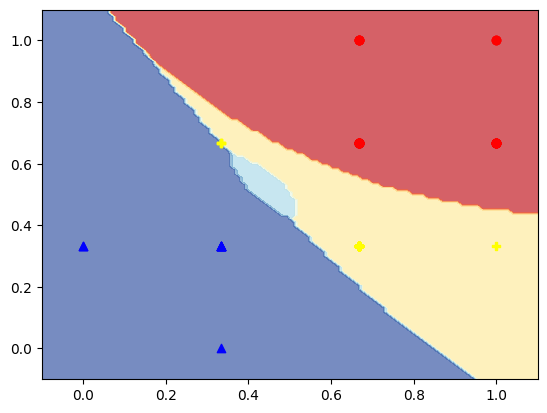

In [28]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[nb_model.predict(x) for x in x_in]]

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

nb_y_pred = np.array([nb_model.predict(x) for x in X_test_2d.values])

one = np.where(nb_y_pred == 1)
two = np.where(nb_y_pred == 2)
three = np.where(nb_y_pred == 3)
four = np.where(nb_y_pred == 4)
five = np.where(nb_y_pred == 5)
six = np.where(nb_y_pred == 6)

plt.scatter(data[one, 0], data[one, 1],
            color='red', marker='o', label='One')
plt.scatter(data[two, 0], data[two, 1],
            color='orange', marker='X', label='Two')
plt.scatter(data[three, 0], data[three, 1],
            color='yellow', marker='P', label='Three')
plt.scatter(data[four, 0], data[four, 1],
            color='cyan', marker='s', label='Four')
plt.scatter(data[five, 0], data[five, 1],
            color='blue', marker='^', label='Five')
plt.scatter(data[six, 0], data[six, 1],
            color='green', marker='D', label='Six')

plt.show()

# Plotting bayes decision surface

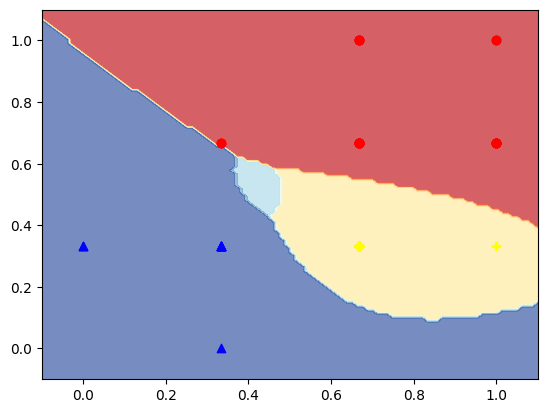

In [29]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[b_model.predict(x) for x in x_in]]

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

b_y_pred = np.array([b_model.predict(x) for x in X_test_2d.values])

one = np.where(b_y_pred == 1)
two = np.where(b_y_pred == 2)
three = np.where(b_y_pred == 3)
four = np.where(b_y_pred == 4)
five = np.where(b_y_pred == 5)
six = np.where(b_y_pred == 6)

plt.scatter(data[one, 0], data[one, 1],
            color='red', marker='o', label='One')
plt.scatter(data[two, 0], data[two, 1],
            color='orange', marker='X', label='Two')
plt.scatter(data[three, 0], data[three, 1],
            color='yellow', marker='P', label='Three')
plt.scatter(data[four, 0], data[four, 1],
            color='cyan', marker='s', label='Four')
plt.scatter(data[five, 0], data[five, 1],
            color='blue', marker='^', label='Five')
plt.scatter(data[six, 0], data[six, 1],
            color='green', marker='D', label='Six')

plt.show()

# Plotting bayes majority class decision surface

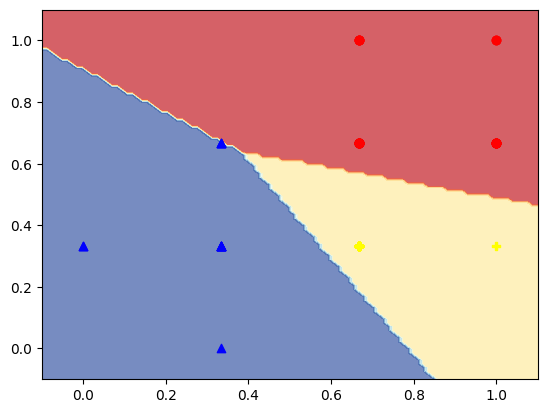

In [30]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[b_majority_class_model.predict(x) for x in x_in]]

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

b_majority_class_y_pred = np.array([b_majority_class_model.predict(x) for x in X_test_2d.values])

one = np.where(b_majority_class_y_pred == 1)
two = np.where(b_majority_class_y_pred == 2)
three = np.where(b_majority_class_y_pred == 3)
four = np.where(b_majority_class_y_pred == 4)
five = np.where(b_majority_class_y_pred == 5)
six = np.where(b_majority_class_y_pred == 6)

plt.scatter(data[one, 0], data[one, 1],
            color='red', marker='o', label='One')
plt.scatter(data[two, 0], data[two, 1],
            color='orange', marker='X', label='Two')
plt.scatter(data[three, 0], data[three, 1],
            color='yellow', marker='P', label='Three')
plt.scatter(data[four, 0], data[four, 1],
            color='cyan', marker='s', label='Four')
plt.scatter(data[five, 0], data[five, 1],
            color='blue', marker='^', label='Five')
plt.scatter(data[six, 0], data[six, 1],
            color='green', marker='D', label='Six')

plt.show()

# Plotting bayes mean class decision surface

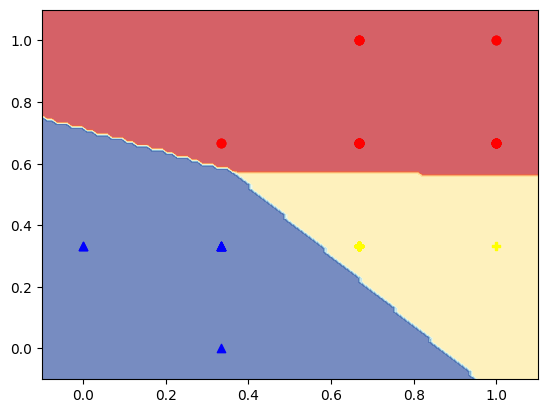

In [31]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[b_mean_class_model.predict(x) for x in x_in]]

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

b_mean_class_y_pred = np.array([b_mean_class_model.predict(x) for x in X_test_2d.values])

one = np.where(b_mean_class_y_pred == 1)
two = np.where(b_mean_class_y_pred == 2)
three = np.where(b_mean_class_y_pred == 3)
four = np.where(b_mean_class_y_pred == 4)
five = np.where(b_mean_class_y_pred == 5)
six = np.where(b_mean_class_y_pred == 6)

plt.scatter(data[one, 0], data[one, 1],
            color='red', marker='o', label='One')
plt.scatter(data[two, 0], data[two, 1],
            color='orange', marker='X', label='Two')
plt.scatter(data[three, 0], data[three, 1],
            color='yellow', marker='P', label='Three')
plt.scatter(data[four, 0], data[four, 1],
            color='cyan', marker='s', label='Four')
plt.scatter(data[five, 0], data[five, 1],
            color='blue', marker='^', label='Five')
plt.scatter(data[six, 0], data[six, 1],
            color='green', marker='D', label='Six')

plt.show()

# Plotting linear bayes decision surface

In [ ]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[lb_model.predict(x) for x in x_in]]

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

lb_y_pred = np.array([lb_model.predict(x) for x in X_test_2d.values])

one = np.where(lb_y_pred == 1)
two = np.where(lb_y_pred == 2)
three = np.where(lb_y_pred == 3)
four = np.where(lb_y_pred == 4)
five = np.where(lb_y_pred == 5)
six = np.where(lb_y_pred == 6)

plt.scatter(data[one, 0], data[one, 1],
            color='red', marker='o', label='One')
plt.scatter(data[two, 0], data[two, 1],
            color='orange', marker='X', label='Two')
plt.scatter(data[three, 0], data[three, 1],
            color='yellow', marker='P', label='Three')
plt.scatter(data[four, 0], data[four, 1],
            color='cyan', marker='s', label='Four')
plt.scatter(data[five, 0], data[five, 1],
            color='blue', marker='^', label='Five')
plt.scatter(data[six, 0], data[six, 1],
            color='green', marker='D', label='Six')

plt.show()